# IMPORTANDO BIBLIOTECAS

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# IMPORTANDO DATASET

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_caa1 = pd.read_excel('./datasets/CAA/CAA-Somalia-AUGUST.xlsx')
df_caa2 = pd.read_excel('./datasets/CAA/CAA-Somalia-JULY.xlsx')
df_caa3 = pd.read_excel('./datasets/CAA/CAA-Somalia-SEPTEMBER.xlsx')

df_navpass1 = pd.read_csv('./datasets/NavPass/NavPass-Somalia-August.csv')
df_navpass2 = pd.read_csv('./datasets/NavPass/NavPass-Somalia-July.csv')
df_navpass3 = pd.read_csv('./datasets/NavPass/NavPass-Somalia-September.csv')

In [5]:
df_caa = pd.concat([df_caa1, df_caa2, df_caa3], ignore_index=True)
df_navpass = pd.concat([df_navpass1, df_navpass2, df_navpass3], ignore_index=True)

In [6]:
print(f"Quantidade de Duplicados CAA: {df_caa.duplicated().sum()}")
print(f"Quantidade de Duplicados NavPass: {df_navpass.duplicated().sum()}")

Quantidade de Duplicados CAA: 1
Quantidade de Duplicados NavPass: 0


In [7]:
# REMOVENDO TODOS OS DUPLICADOS
df_caa = df_caa.drop_duplicates()
df_navpass = df_navpass.drop_duplicates()

In [8]:
df_caa.head(1)

,Operator Name,Operator EF Legacy Code,Aircraft Registration No,CallSign Flight No,Aircraft Type Code ICAO,Max Take Off Weight,Max Take Off Weight UNIT,From Airport Code ICAO,To Airport Code ICAO,Flight Date Time,Arrival Time,Departure Time,Entry Time,Exit Time,Flight Information Region,Flight Routing,Distance,Distance UNIT,Entry Point,Exit Point,Charge Unit Rate,Over-flight Total Amount,Currency Code
0,KANGALA AIR EXPRESS,KAN001,SUB,1572,L100,33203,KG,HCMN,HADR,2024-08-26 08:08:00,2024-08-26 08:13:00,NaT,NaT,2024-08-26 08:21:00,MOG FIR,SOLUL DCT,37.95,NMI,ETD,SOLUL,275,275,USD


In [9]:
df_navpass.head(1)

,Bill,Fir Start Date,Bill Date,Accounting Date,Due Date,Total,Total Currency,Outstanding,Outstanding Currency,Country,Operator,Operator Ref ID,Call Sign,Aircraft Registration,Origin ICAO Code,Origin IATA Code,Destination ICAO Code,Destination IATA Code,Aircraft Manufacturer,Aircraft Model,Aircraft Model ICAO Code,Aircraft Model MTOW (kg),Fir Started,Fir Ended,Duration,Flight ID,Flight Segment ID,Flight Segment Observed Point Count,Flight Segment Point Count,Flight Segment Duration Seconds,Flight Duration Seconds,Flight Length Km,Flight Path Observed Point Count,Flight Path Point Count,Manually Updated,Flight Takeoff,Flight Landing,Departure Scheduled Utc,Arrival Scheduled Utc
0,4EKFKDNUEZ,2024-08-18 10:51:00 UTC,NaN,NaN,NaN,275.0,USD,275.0,USD,Somalia,PREMIER AIRLINES,PD9QYZYP22,5YJWF,5YJWF,NaN,NaN,NaN,NaN,FOKKER,FOKKER 70,F70,36740.0,2024-08-18 @ 10:51 UTC,2024-08-18 @ 11:32 UTC,00:41:00,5f2a9c31-56cb-432d-8017-4d3b1c04f3c3,25f2a0c0-c73e-46a2-a6e5-1d9ae8651db9,38,38,2460,5040,995.2,80,80,False,2024-08-18 10:09:00 UTC,2024-08-18 11:33:00 UTC,NaN,NaN


# PRÉ-PROCESSAMENTO

In [10]:
columns_to_datetime = [
    'Fir Start Date', 
    'Entry Point', 'Fir Started',
    'Exit Point', 'Fir Ended',
    'Arrival Time', 'Flight Landing',
    'Flight Date Time', 'Flight Takeoff'
]

for col in df_caa.columns:
    if col not in columns_to_datetime:
        df_caa[col] = df_caa[col].astype(str)

for col in df_navpass.columns:
    if col not in columns_to_datetime:
        df_navpass[col] = df_navpass[col].astype(str)

In [11]:
# PASSANDO AS DEVIDAS COLUNAS PARA DATETIME
df_caa['Flight Date Time'] = pd.to_datetime(df_caa['Flight Date Time']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_caa['Arrival Time'] = pd.to_datetime(df_caa['Arrival Time']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_caa['Entry Time'] = pd.to_datetime(df_caa['Entry Time']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_caa['Exit Time'] = pd.to_datetime(df_caa['Exit Time']).dt.strftime('%Y-%m-%d %H:%M:%S')


df_navpass['Fir Start Date'] = pd.to_datetime(df_navpass['Fir Start Date']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_navpass['Flight Takeoff'] = pd.to_datetime(df_navpass['Flight Takeoff']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_navpass['Flight Landing'] = pd.to_datetime(df_navpass['Flight Landing']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_navpass['Fir Started'] = pd.to_datetime(df_navpass['Fir Started'].str.replace('@', ' ').str.replace('UTC', '', regex=False)).dt.strftime('%Y-%m-%d %H:%M:%S')
df_navpass['Fir Ended'] = pd.to_datetime(df_navpass['Fir Ended'].str.replace('@', ' ').str.replace('UTC', '', regex=False)).dt.strftime('%Y-%m-%d %H:%M:%S')

In [12]:
# PASSANDO AS DEVIDAS COLUNAS PARA FLOAT
df_caa['Distance'] = pd.to_numeric(df_caa['Distance'], errors='coerce').astype(float)
df_caa['Max Take Off Weight'] = pd.to_numeric(df_caa['Max Take Off Weight'], errors='coerce').astype(float)

df_navpass['Flight Length Km'] = pd.to_numeric(df_navpass['Flight Length Km'], errors='coerce').astype(float)
df_navpass['Aircraft Model MTOW (kg)'] = pd.to_numeric(df_navpass['Aircraft Model MTOW (kg)'], errors='coerce').astype(float)

In [13]:
# PASSANDO A COLUNA DO DATASET CAA (DISTANCE), QUE ESTÁ EM MILHAS NÁUTICAS, PARA KM
df_caa['Distance Km'] = df_caa['Distance'] * 1.852

In [14]:
# RENOMEANDO COLUNAS PARA DEIXAR COM O MESMO NOME
df_caa.rename(columns={
    'CallSign Flight No': 'Call Sign',
    'Aircraft Registration No': 'Aircraft Registration',
    'From Airport Code ICAO': 'Origin ICAO Code',
    'To Airport Code ICAO': 'Destination ICAO Code',
    'Aircraft Type Code ICAO': 'Aircraft Model ICAO Code',
    'Entry Time': 'Fir Started',
    'Exit Time': 'Fir Ended',
    'Flight Date Time': 'Fir Start Date'
}, inplace=True)

In [15]:
# DEFININDO KEY PARA FAZERMOS A JUNÇÃO DOS DATASETS
colunas_chave = ['Call Sign', 'Aircraft Registration', 'Origin ICAO Code', 'Destination ICAO Code', 'Aircraft Model ICAO Code']
colunas_chave_merged_left = ['Call Sign_caa', 'Aircraft Registration_caa', 'Origin ICAO Code_caa', 'Destination ICAO Code_caa', 'Aircraft Model ICAO Code_caa']
colunas_chave_merged_right = ['Call Sign_navpass', 'Aircraft Registration_navpass', 'Origin ICAO Code_navpass', 'Destination ICAO Code_navpass', 'Aircraft Model ICAO Code_navpass']

df_caa['key'] = df_caa[colunas_chave].astype(str).agg('_'.join, axis=1)

df_navpass['key'] = df_navpass[colunas_chave].astype(str).agg('_'.join, axis=1)

Acima definimos nossas chaves de comparação em ambos datasets 'colunas_chave'.

Esses valores se referem ao tipo da aeronave, número de vôo específico, id do aeroporto de origem, entre outras informações relevantes.

Apenas isso não garante que nossa chave seja única, porém conseguimos depois nos basear também na Data/Horário de viagem - Você verá mais a frente.

In [16]:
# DEFININDO DATETIME NOVAMENTE PARA FAZERMOS A DIFERENÇA
df_caa['Fir Start Date'] = pd.to_datetime(df_caa['Fir Start Date'])
df_caa['Fir Started'] = pd.to_datetime(df_caa['Fir Started'])
df_caa['Fir Ended'] = pd.to_datetime(df_caa['Fir Ended'])

df_navpass['Fir Start Date'] = pd.to_datetime(df_caa['Fir Start Date'])
df_navpass['Fir Started'] = pd.to_datetime(df_navpass['Fir Started'])
df_navpass['Fir Ended'] = pd.to_datetime(df_navpass['Fir Ended'])

In [17]:
# CRIANDO UMA TABELA A PARTE (MERGED) PARA FAZERMOS AS ANÁLISES
df_merged_left = pd.merge(df_caa, df_navpass, on='key', how='left', suffixes=('_caa', '_navpass'))
df_merged_left['key'] = df_merged_left[colunas_chave_merged_left].astype(str).agg('_'.join, axis=1)

df_merged_right = pd.merge(df_caa, df_navpass, on='key', how='right', suffixes=('_caa', '_navpass'))
df_merged_right['key'] = df_merged_right[colunas_chave_merged_right].astype(str).agg('_'.join, axis=1)

In [18]:
# 1. CALCULANDO AS DIFERENÇAS DE TEMPO
df_merged_left['time_diff_start'] = (df_merged_left['Fir Start Date_caa'] - df_merged_left['Fir Start Date_navpass']).abs()
df_merged_left['time_diff_entry'] = (df_merged_left['Fir Started_caa'] - df_merged_left['Fir Started_navpass']).abs()
df_merged_left['time_diff_ended'] = (df_merged_left['Fir Ended_caa'] - df_merged_left['Fir Ended_navpass']).abs()

df_merged_right['time_diff_start'] = (df_merged_right['Fir Start Date_caa'] - df_merged_right['Fir Start Date_navpass']).abs()
df_merged_right['time_diff_entry'] = (df_merged_right['Fir Started_caa'] - df_merged_right['Fir Started_navpass']).abs()
df_merged_right['time_diff_ended'] = (df_merged_right['Fir Ended_caa'] - df_merged_right['Fir Ended_navpass']).abs()

In [19]:
# df_merged_left['key_2'] = df_merged_left[['key', 'Fir Start Date_caa']].astype(str).agg('_'.join, axis=1)
# df_merged_right['key_2'] = df_merged_right[['key', 'Fir Start Date_navpass']].astype(str).agg('_'.join, axis=1)

df_merged_left['key_2'] = df_merged_left[['key', 'Fir Started_caa']].astype(str).agg('_'.join, axis=1)
df_merged_right['key_2'] = df_merged_right[['key', 'Fir Started_navpass']].astype(str).agg('_'.join, axis=1)

Acima criamos uma chamada 'key_2', que é a junção da Key e também da coluna Fir Started, que em tese, é o horário em que certo avião passou em uma determinada zona aérea (tipo fronteira de país).

Essa é a chave que utilizaremos durante todo o restante da análise. Será muito importante para gente pois é com ela que compararemos ambos datasets sem ter ambiguidade.

In [20]:
# 2. DEFININDO REGRAS E PRIORIDADES
def assign_priority(row):
    if row['time_diff_start'] == pd.Timedelta(0) and row['time_diff_entry'] == pd.Timedelta(0) and row['time_diff_ended'] == pd.Timedelta(0):
        return 0
    elif row['time_diff_start'] == pd.Timedelta(0) and row['time_diff_entry'] == pd.Timedelta(0):
        return 1
    elif row['time_diff_start'] == pd.Timedelta(0) and row['time_diff_ended'] == pd.Timedelta(0):
        return 2
    elif row['time_diff_start'] == pd.Timedelta(0):
        return 3
    elif row['time_diff_entry'] == pd.Timedelta(0) and row['time_diff_ended'] == pd.Timedelta(0):
        return 4
    elif row['time_diff_entry'] == pd.Timedelta(0):
        return 5
    elif row['time_diff_ended'] == pd.Timedelta(0):
        return 6
    else:
        return 7

df_merged_left['priority'] = df_merged_left.apply(assign_priority, axis=1)
df_merged_left['priority'] = df_merged_left['priority'].astype(int)
df_left_priority_7 = df_merged_left[df_merged_left['priority'] == 7].copy()
df_left_priority_rest = df_merged_left[df_merged_left['priority'] != 7].copy()

df_merged_right['priority'] = df_merged_right.apply(assign_priority, axis=1)
df_merged_right['priority'] = df_merged_right['priority'].astype(int)
df_right_priority_7 = df_merged_right[df_merged_right['priority'] == 7].copy()
df_right_priority_rest = df_merged_right[df_merged_right['priority'] != 7].copy()

Criamos uma coluna chamada 'priority' para representar o nível de importância (quanto menor, mais importante) para considerar como uma conexão entre as tabelas:

- **Nível 0**: Quando ambas datas/horas Start Date, Fir Started e Fir Ended batem em ambos datasets;
- **Nível 1**: Quando ambas datas/horas Start Date e Fir Started batem em ambos datasets;
- **Nível 2**: Quando ambas datas/horas Start Date, e Fir Ended batem em ambos datasets;
- **Nível 3**: Quando apenas a data/hora  de Start Date bate em ambos datasets;
- **Nível 4**: Quando ambas datas/horas Fir Started e Fir Ended batem em ambos datasets;
- **Nível 5**: Quando apenas a data/hora de Fir Started bate em ambos datasets;
- **Nível 6**: Quando apenas a data/hora de Fir Ended bate em ambos datasets;
- **Nível 7**: Quando nenhuma data/hora bate em ambos datasets.

In [21]:
# GROUPBY POR KEY_2 PARA SELECIONAR APENAS OS VALORES NÃO DUPLICADOS (SELECIONANDO A DATA MÍNIMA)
min_time_diff_per_key_left = df_left_priority_7.dropna(subset=['time_diff_entry']).groupby('key_2')['time_diff_entry'].min().reset_index()
min_time_diff_per_key_left.rename(columns={'time_diff_entry': 'min_time_diff_start'}, inplace=True)

# 
df_left_priority_7 = df_left_priority_7.merge(min_time_diff_per_key_left, on='key_2', how='left')
df_left_priority_7_best = df_left_priority_7[df_left_priority_7['time_diff_entry'] == df_left_priority_7['min_time_diff_start']].copy()

keys_in_rest_left = df_left_priority_rest['key_2'].unique()
df_left_priority_7_final = df_left_priority_7_best[~df_left_priority_7_best['key_2'].isin(keys_in_rest_left)].copy()
df_final_left = pd.concat([df_left_priority_rest, df_left_priority_7_final], ignore_index=True)

In [22]:
# GROUPBY POR KEY_2 PARA SELECIONAR APENAS OS VALORES NÃO DUPLICADOS (SELECIONANDO A DATA MÍNIMA)
min_time_diff_per_key_right = df_right_priority_7.dropna(subset=['time_diff_entry']).groupby('key_2')['time_diff_entry'].min().reset_index()
min_time_diff_per_key_right.rename(columns={'time_diff_entry': 'min_time_diff_start'}, inplace=True)

df_right_priority_7 = df_right_priority_7.merge(min_time_diff_per_key_right, on='key_2', how='left')
df_right_priority_7_best = df_right_priority_7[df_right_priority_7['time_diff_entry'] == df_right_priority_7['min_time_diff_start']].copy()

keys_in_rest_right = df_right_priority_rest['key_2'].unique()
df_right_priority_7_final = df_right_priority_7_best[~df_right_priority_7_best['key_2'].isin(keys_in_rest_right)].copy()
df_final_right = pd.concat([df_right_priority_rest, df_right_priority_7_final], ignore_index=True)

No desenvolvimento acima, fazemos uma regra bem específica, que é, juntar todos o dataset 'merged', que é um dataset onde é interligado pelos dados tanto do CAA quanto do NavPass (vice-versa).

E aí, em resumo, com isso conseguimos tirar uma comparação entre ambos datasets, para que consigamos interligar as linhas (vôos) mesmo com diferentes horários - que em prática selecionamos o menor horário possível.

Ou seja, imagine que temos a Key igual tanto no dataset CAA, quanto no NavPass, porém o valor da coluna Fir Started é:

- **CAA: 16/12/2024 01:00:00**
- **NavPass: 16/12/2024 01:30:00**

Então, supondo que essa é a menor diferença encontrada entre ambos datasets, ele irá juntar e tornar um caso 'batido', que nada mais é do que casos interligados entre ambos datasets.

## RESULTADOS

In [23]:
df_caa['key_2'] = df_caa[['key', 'Fir Started']].astype(str).agg('_'.join, axis=1)
df_navpass['key_2'] = df_navpass[['key', 'Fir Started']].astype(str).agg('_'.join, axis=1)

In [31]:
qntd_registros_duplicated_caa = len(df_caa['key_2'][df_caa['key_2'].duplicated(keep=False)])
qntd_registros_diferentes_caa = len(df_merged_left['key_2'].unique())
qntd_registros_batidos_caa = len(df_final_left['key_2'].unique())
qntd_casos_n_encontrados_caa = len(df_merged_left.loc[~df_merged_left['key_2'].isin(df_final_left['key_2']), 'key_2'].unique())

qnd_registros_duplicated_navpass = len(df_navpass['key_2'][df_navpass['key_2'].duplicated(keep=False)])
qntd_registros_diferentes_navpass = len(df_merged_right['key_2'].unique())
qntd_registros_batidos_navpass = len(df_final_right['key_2'].unique())
qntd_casos_n_encontrados_navpass = len(df_merged_right.loc[~df_merged_right['key_2'].isin(df_final_right['key_2']), 'key_2'].unique())

In [32]:
print("#####################################################################")
print(f"Quantidade de registros (NÃO DUPLICADOS) tabela CAA: {qntd_registros_diferentes_caa}")
print(f"Quantidade de registros (DUPLICADOS) tabela CAA: {qntd_registros_duplicated_caa}")
print(f"Quantidade de registros encontrados do CAA no NavPass: {qntd_registros_batidos_caa}")
print(f"Quantidade de registros NÃO encontrados do CAA no NavPass: {qntd_casos_n_encontrados_caa}")
print("#####################################################################")

#####################################################################
Quantidade de registros (NÃO DUPLICADOS) tabela CAA: 13529
Quantidade de registros (DUPLICADOS) tabela CAA: 5965
Quantidade de registros encontrados do CAA no NavPass: 7807
Quantidade de registros NÃO encontrados do CAA no NavPass: 5722
#####################################################################


In [33]:
print("#####################################################################")
print(f"Quantidade de registros (NÃO DUPLICADOS) tabela NavPass: {qntd_registros_diferentes_navpass}")
print(f"Quantidade de registros (DUPLICADOS) tabela NavPass: {qnd_registros_duplicated_navpass}")
print(f"Quantidade de registros encontrados do NavPass no CAA: {qntd_registros_batidos_navpass}")
print(f"Quantidade de registros NÃO encontrados do NavPass no CAA: {qntd_casos_n_encontrados_navpass}")
print("#####################################################################")

#####################################################################
Quantidade de registros (NÃO DUPLICADOS) tabela NavPass: 19531
Quantidade de registros (DUPLICADOS) tabela NavPass: 3
Quantidade de registros encontrados do NavPass no CAA: 10143
Quantidade de registros NÃO encontrados do NavPass no CAA: 9388
#####################################################################


- Com as análises, identifiquei que os valores duplicados que existem em CAA são por conta dos valores nulos em 'Fir Started', prejudicando nossa análise (afinal de contas, sem o dado de início do vôo não conseguimos analisar nada).

- Já os valores duplicados em NavPass (apenas 3), são realmente valores duplicados, apenas o Flight Duration que se altera em uma das ocorrências, porém o avião, distância de vôo e IDs de viagem, são os mesmos.

In [27]:
# EXPORTAR LINHAS BATIDAS ENTRE AMBOS DATASETS
df_final_left.to_csv('linhas_batidas_CAA.csv', index=False)
df_final_right.to_csv('linhas_batidas_NAVPASS.csv', index=False)

In [28]:
# EXPORTAR LINHAS NÃO BATIDAS ENTRE AMBOS DATASETS (ou seja, linhas que estão apenas em um dataset)
df_caa_naobatido = df_caa[~df_caa['key_2'].isin(df_final_left['key_2'])]
df_navpass_naobatido = df_navpass[~df_navpass['key_2'].isin(df_final_right['key_2'])]

df_caa_naobatido.to_csv('linhas_NÃO_batidas_CAA.csv', index=False)
df_navpass_naobatido.to_csv('linhas_NÃO_batidas_NAVPASS.csv', index=False)

In [29]:
# EXPORTAR LINHAS DUPLICADAS
duplicated_keys_caa = df_caa['key_2'][df_caa['key_2'].duplicated(keep=False)]
duplicated_rows_caa = df_caa[df_caa['key_2'].isin(duplicated_keys_caa)]

duplicated_keys_navpass = df_navpass['key_2'][df_navpass['key_2'].duplicated(keep=False)]
duplicated_rows_navpass = df_navpass[df_navpass['key_2'].isin(duplicated_keys_navpass)]

duplicated_rows_caa.to_csv('linhas_duplicadas_CAA.csv', index=False)
duplicated_rows_navpass.to_csv('linhas_duplicadas_NAVPASS.csv', index=False)

# ANÁLISE DE DADOS

Agora, com os datasets encontrados acima, faremos uma breve análise de dados para garantirmos que estamos tendo conhecimento de todos os padrões possívels.

### RESUMO DE DADOS EM CADA DATASET

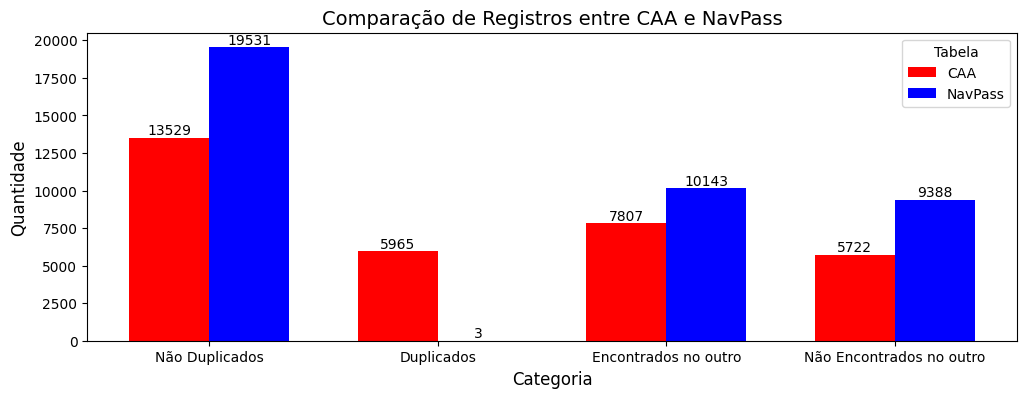

In [82]:
categories = ['Não Duplicados', 'Duplicados', 'Encontrados no outro', 'Não Encontrados no outro']
values_caa = [
    qntd_registros_diferentes_caa,
    qntd_registros_duplicated_caa,
    qntd_registros_batidos_caa,
    qntd_casos_n_encontrados_caa
]
values_navpass = [
    qntd_registros_diferentes_navpass,
    qnd_registros_duplicated_navpass,
    qntd_registros_batidos_navpass,
    qntd_casos_n_encontrados_navpass
]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 4))

bars_caa = ax.bar(x - width/2, values_caa, width, label='CAA', color='red')
bars_navpass = ax.bar(x + width/2, values_navpass, width, label='NavPass', color='blue')

for bars in [bars_caa, bars_navpass]:
    for bar in bars:
        ax.annotate(
            str(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2., bar.get_height() + 2),  # Margem superior ajustada
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Configurações do gráfico
ax.set_title('Comparação de Registros entre CAA e NavPass', fontsize=14)
ax.set_xlabel('Categoria', fontsize=12)
ax.set_ylabel('Quantidade', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=0)
ax.legend(title='Tabela')

plt.show()

### DADOS ENCONTRADOS (BATIDOS)

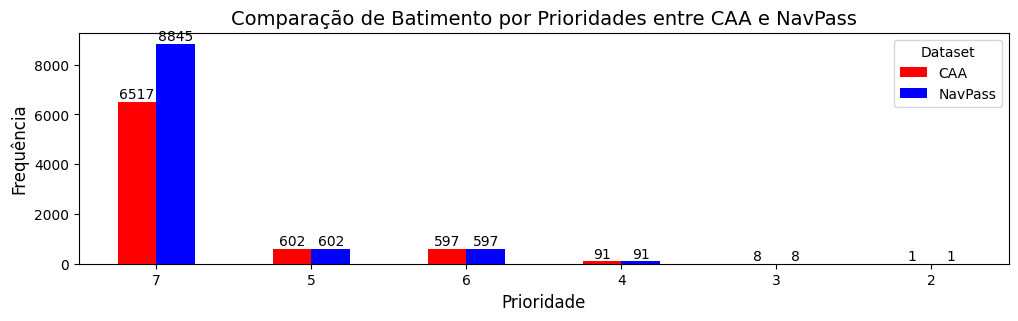

In [46]:
counts_left = df_final_left['priority'].value_counts()
counts_right = df_final_right['priority'].value_counts()

comparison_df = pd.DataFrame({
    'CAA': counts_left,
    'NavPass': counts_right
}).fillna(0)

fig, ax = plt.subplots(figsize=(12, 3))

comparison_df.plot(kind='bar', ax=ax, color=['red', 'blue'])
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height() + 0.2),
        ha='center', va='bottom', fontsize=10, color='black'
    )

ax.set_title('Comparação de Batimento por Prioridades entre CAA e NavPass', fontsize=14)
ax.set_xlabel('Prioridade', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
ax.legend(title='Dataset')
ax.set_xticks(range(len(comparison_df.index)))
ax.set_xticklabels(comparison_df.index, rotation=0)

plt.show()
plt.show()

Relembrando:

- **Nível 0**: Quando ambas datas/horas Start Date, Fir Started e Fir Ended batem em ambos datasets;
- **Nível 1**: Quando ambas datas/horas Start Date e Fir Started batem em ambos datasets;
- **Nível 2**: Quando ambas datas/horas Start Date, e Fir Ended batem em ambos datasets;
- **Nível 3**: Quando apenas a data/hora de Start Date bate em ambos datasets;
- **Nível 4**: Quando ambas datas/horas Fir Started e Fir Ended batem em ambos datasets;
- **Nível 5**: Quando apenas a data/hora de Fir Started bate em ambos datasets;
- **Nível 6**: Quando apenas a data/hora de Fir Ended bate em ambos datasets;
- **Nível 7**: Quando nenhuma data/hora bate em ambos datasets.

### DADOS NÃO ENCONTRADOS EM AMBOS (NÃO BATIDOS)

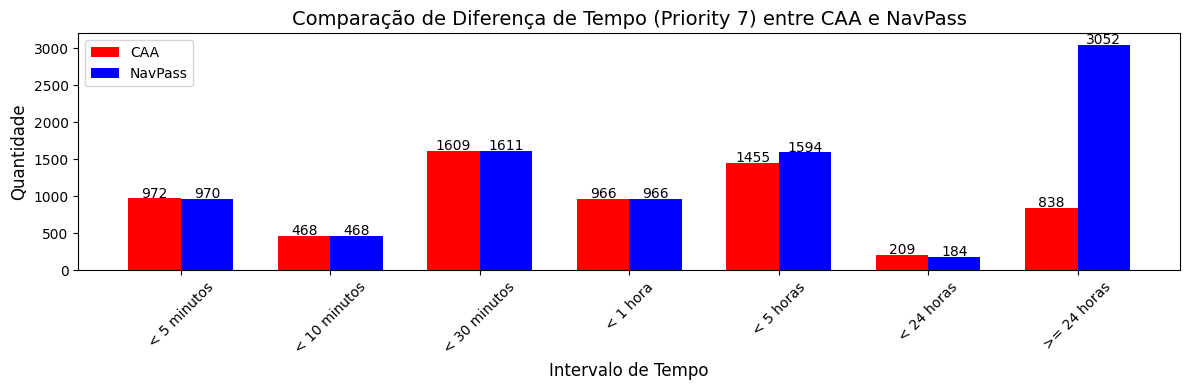

In [81]:
df_final_left['min_time_diff_start_minutes'] = df_final_left['min_time_diff_start'].dt.total_seconds() / 60
df_final_right['min_time_diff_start_minutes'] = df_final_right['min_time_diff_start'].dt.total_seconds() / 60

time_intervals = {
    '< 5 minutos': (0, 5),
    '< 10 minutos': (5, 10),
    '< 30 minutos': (10, 30),
    '< 1 hora': (30, 60),
    '< 5 horas': (60, 300),
    '< 24 horas': (300, 1440),
    '>= 24 horas': (1440, float('inf'))
}

interval_counts_left = {
    label: df_final_left[
        (df_final_left['min_time_diff_start_minutes'] > bounds[0]) &
        (df_final_left['min_time_diff_start_minutes'] <= bounds[1])
    ].shape[0]
    for label, bounds in time_intervals.items()
}

interval_counts_right = {
    label: df_final_right[
        (df_final_right['min_time_diff_start_minutes'] > bounds[0]) &
        (df_final_right['min_time_diff_start_minutes'] <= bounds[1])
    ].shape[0]
    for label, bounds in time_intervals.items()
}

fig, ax = plt.subplots(figsize=(12, 4))

x = np.arange(len(time_intervals))
width = 0.35

bars_left = ax.bar(x - width/2, interval_counts_left.values(), width, color='red', label='CAA')
bars_right = ax.bar(x + width/2, interval_counts_right.values(), width, color='blue', label='NavPass')

for bars in [bars_left, bars_right]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2., bar.get_height() + 12, str(int(bar.get_height())), 
                ha='center', fontsize=10)

ax.set_title('Comparação de Diferença de Tempo (Priority 7) entre CAA e NavPass', fontsize=14)
ax.set_xlabel('Intervalo de Tempo', fontsize=12)
ax.set_ylabel('Quantidade', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(interval_counts_left.keys(), rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

## DEMAIS ANÁLISES

### DOS DADOS NÃO BATIDOS, EXISTE ALGUM PADRÃO ENTRE O ...? (CAA)

##### NOME OPERADOR

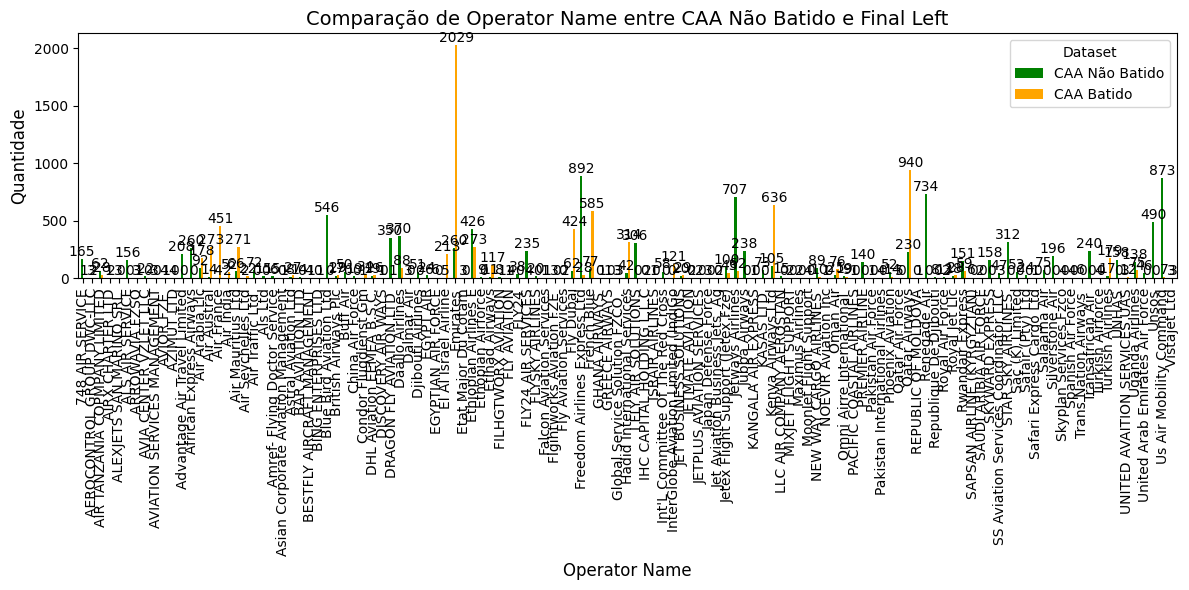

In [99]:
operator_counts_caa_naobatido = df_caa_naobatido['Operator Name'].value_counts()
operator_counts_final_left = df_final_left['Operator Name'].value_counts()

comparison_df = pd.DataFrame({
    'CAA Não Batido': operator_counts_caa_naobatido,
    'CAA Batido': operator_counts_final_left
}).fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))

comparison_df.plot(kind='bar', ax=ax, color=['green', 'orange'])

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Comparação de Operator Name entre CAA Não Batido e Final Left', fontsize=14)
ax.set_xlabel('Operator Name', fontsize=12)
ax.set_ylabel('Quantidade', fontsize=12)
ax.legend(title='Dataset')
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

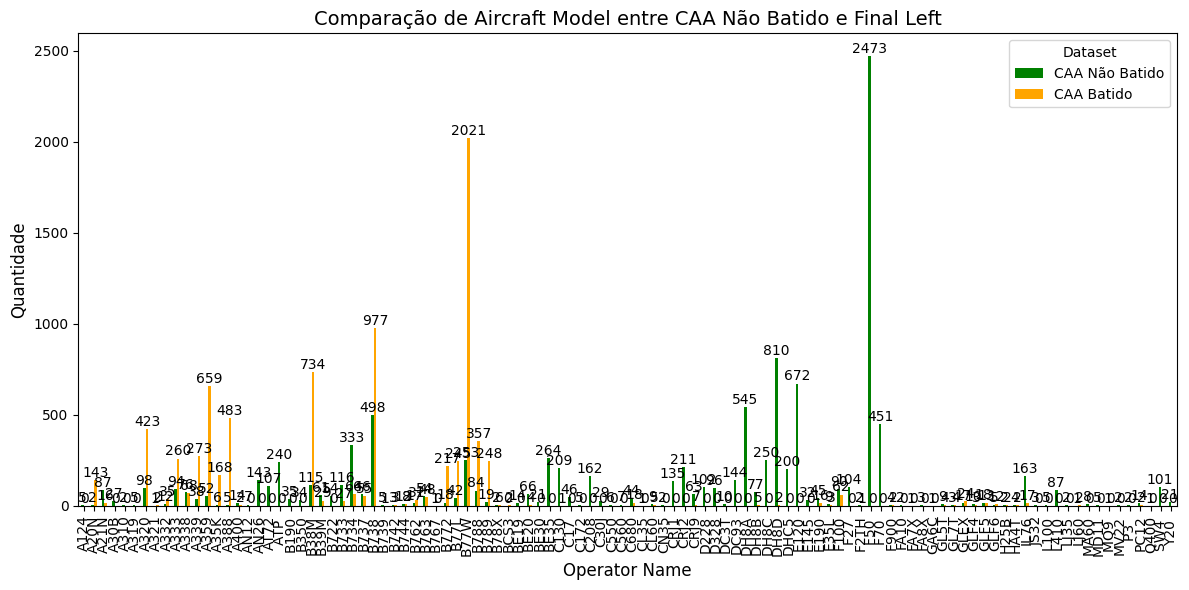

In [100]:
aircraftmodel_counts_caa_naobatido = df_caa_naobatido['Aircraft Model ICAO Code'].value_counts()
aircraftmodel_counts_final_left = df_final_left['Aircraft Model ICAO Code_caa'].value_counts()

comparison_df = pd.DataFrame({
    'CAA Não Batido': aircraftmodel_counts_caa_naobatido,
    'CAA Batido': aircraftmodel_counts_final_left
}).fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))

comparison_df.plot(kind='bar', ax=ax, color=['green', 'orange'])

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Comparação de Aircraft Model entre CAA Não Batido e Final Left', fontsize=14)
ax.set_xlabel('Operator Name', fontsize=12)
ax.set_ylabel('Quantidade', fontsize=12)
ax.legend(title='Dataset')
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### DOS DADOS NÃO BATIDOS, EXISTE ALGUM PADRÃO ENTRE O ...? (NAVPASS)

#### NOME OPERADOR

C:\Users\guilh\AppData\Local\Temp\ipykernel_18996\2711382982.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


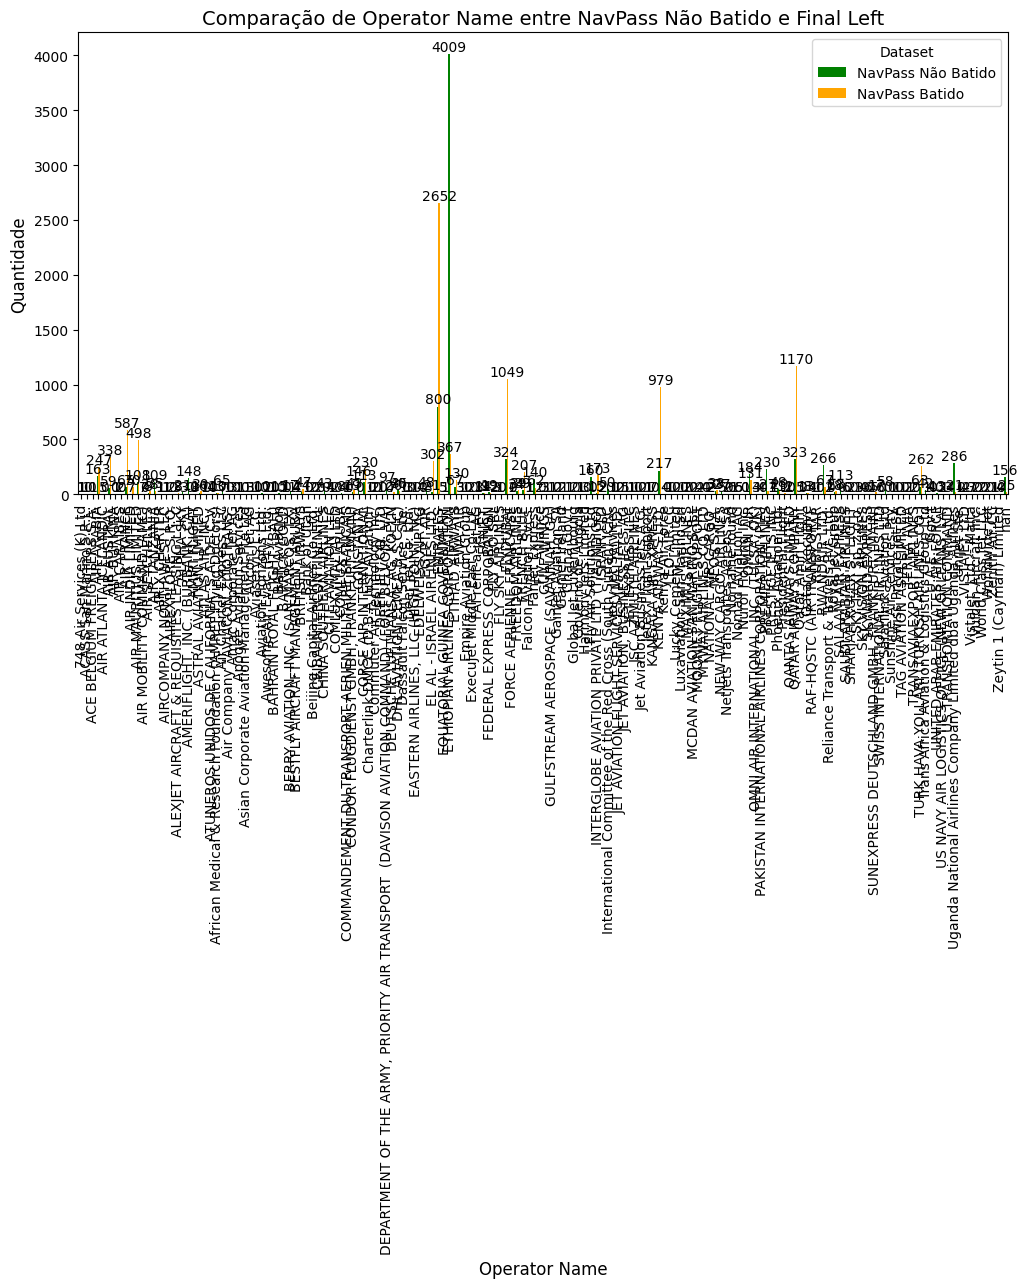

In [103]:
operator_counts_caa_naobatido = df_navpass_naobatido['Operator'].value_counts()
operator_counts_final_left = df_final_right['Operator'].value_counts()

comparison_df = pd.DataFrame({
    'NavPass Não Batido': operator_counts_caa_naobatido,
    'NavPass Batido': operator_counts_final_left
}).fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))

comparison_df.plot(kind='bar', ax=ax, color=['green', 'orange'])

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Comparação de Operator Name entre NavPass Não Batido e Final Left', fontsize=14)
ax.set_xlabel('Operator Name', fontsize=12)
ax.set_ylabel('Quantidade', fontsize=12)
ax.legend(title='Dataset')
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### MODELO DO AVIÃO

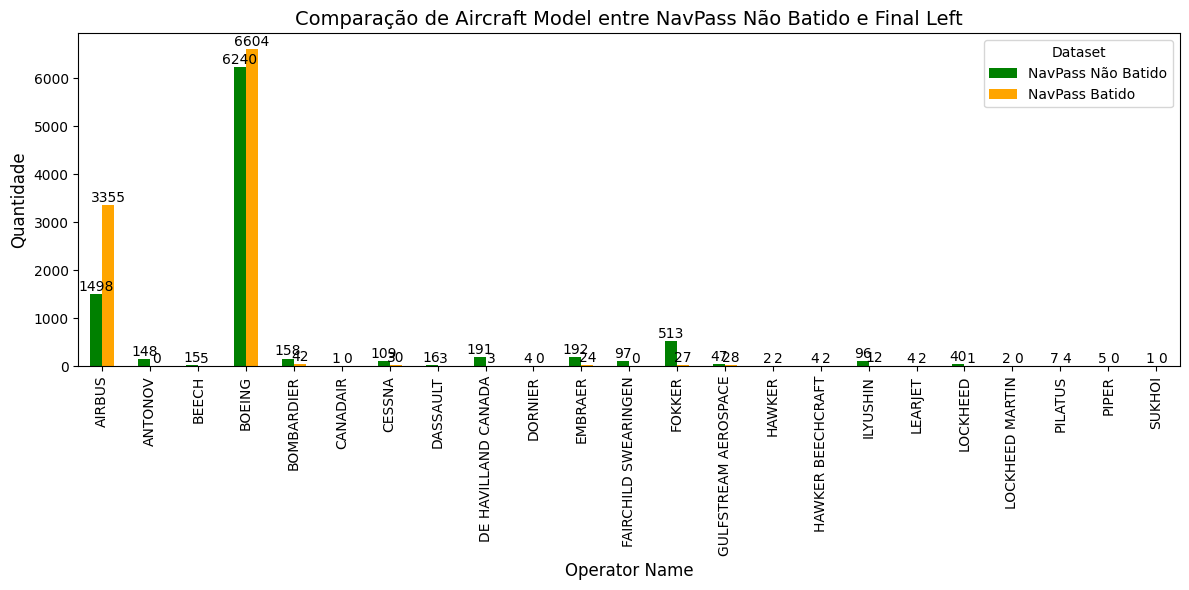

In [102]:
aircraftmodel_counts_caa_naobatido = df_navpass_naobatido['Aircraft Manufacturer'].value_counts()
aircraftmodel_counts_final_left = df_final_right['Aircraft Manufacturer'].value_counts()

comparison_df = pd.DataFrame({
    'NavPass Não Batido': aircraftmodel_counts_caa_naobatido,
    'NavPass Batido': aircraftmodel_counts_final_left
}).fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))

comparison_df.plot(kind='bar', ax=ax, color=['green', 'orange'])

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Comparação de Aircraft Model entre NavPass Não Batido e Final Left', fontsize=14)
ax.set_xlabel('Operator Name', fontsize=12)
ax.set_ylabel('Quantidade', fontsize=12)
ax.legend(title='Dataset')
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()